In [1]:
pip install pycaret -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.1.6 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.2 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
xarray 2024.3.0 requires packaging>=22, but you have packaging 21.3 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated p

In [2]:
pip install autoviz -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
ydata-profiling 4.6.4 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import re
import time
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor

In [4]:
%matplotlib inline

In [5]:
warnings.filterwarnings('ignore')

In [6]:
from pycaret.regression import *

In [7]:
df = pd.read_csv('../input/house-price-tehran-iran/housePrice.csv')
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2723,83,2,False,False,True,Parand,5.000000e+08,16666.67
2911,45,1,False,False,False,Karoon,6.800000e+08,22666.67
123,78,2,False,False,True,Parand,3.700000e+08,12333.33
2297,86,2,True,True,False,Firoozkooh Kuhsar,7.500000e+08,25000.00
341,192,3,True,True,True,Saadat Abad,1.950000e+10,650000.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [9]:
df.drop('Price(USD)', axis=1, inplace=True)

In [10]:
setup(df, target='Price', session_id=85, remove_outliers=True)

,Description,Value
0,Session id,85
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3479, 7)"
4,Transformed data shape,"(3357, 7)"
5,Transformed train set shape,"(2313, 7)"
6,Transformed test set shape,"(1044, 7)"
7,Numeric features,1
8,Categorical features,2
9,Rows with missing values,0.7%


In [11]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1787068166.2256,32607070379028836352.0000,5370151218.8995,0.5414,0.5069,0.4474,1.9200
et,Extra Trees Regressor,1823696328.6765,33692139050886713344.0000,5418666552.5989,0.5371,0.5173,0.4336,0.3400
lightgbm,Light Gradient Boosting Machine,1850921317.1389,33901565516324040704.0000,5473993468.5078,0.5246,0.4909,0.4263,0.6090
xgboost,Extreme Gradient Boosting,1771836281.6000,33832566550434308096.0000,5487361638.4000,0.5216,0.5159,0.4102,0.3610
gbr,Gradient Boosting Regressor,1869451000.9279,32768195979990835200.0000,5451537576.2650,0.5212,0.5211,0.4815,0.2280
rf,Random Forest Regressor,1836202243.8133,35120587005921230848.0000,5551883571.7572,0.5134,0.5016,0.4147,0.3990
knn,K Neighbors Regressor,2037582374.4000,37219049279796019200.0000,5751254720.0000,0.4772,0.5646,0.5148,0.2080
lasso,Lasso Regression,2601293612.7778,36766955829048868864.0000,5814135261.6413,0.4616,0.9709,1.0037,0.1640
lr,Linear Regression,2601293587.3264,36766955675486199808.0000,5814135244.9921,0.4616,0.9709,1.0037,0.7840
llar,Lasso Least Angle Regression,2601293612.7778,36766955829048868864.0000,5814135261.6413,0.4616,0.9709,1.0037,0.1640


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [12]:
my_model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2436407040.0000,52291330457770917888.0000,7231274496.0000,0.4934,0.6176,0.5137
1,1794569600.0000,47927109322383818752.0000,6922940928.0000,0.4853,0.4728,0.3674
2,1438750976.0000,19944804477298540544.0000,4465960448.0000,0.5474,0.5287,0.5112
3,1848169600.0000,51038063123966722048.0000,7144092672.0000,0.3295,0.5467,0.3775
4,1939670016.0000,36721247451904737280.0000,6059805696.0000,0.4617,0.4852,0.3741
5,2389075968.0000,52432015169568112640.0000,7240995328.0000,0.3583,0.5344,0.4125
6,1986535296.0000,51242990101151612928.0000,7158420992.0000,0.4293,0.4705,0.3673
7,1348971392.0000,11585915761201250304.0000,3403809024.0000,0.5758,0.4715,0.3761
8,1515776000.0000,11929438378090561536.0000,3453901824.0000,0.6574,0.4999,0.4015


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
df.sample(3)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
2932,103,2,True,True,True,Feiz Garden,4.000000e+09
2092,70,2,False,True,True,Elm-o-Sanat,1.800000e+09
1847,75,2,True,True,False,West Ferdows Boulevard,2.500000e+09


In [14]:
df.describe()

,Room,Price
count,3479.000000,3.479000e+03
mean,2.079908,5.359023e+09
std,0.758275,8.099935e+09
min,0.000000,3.600000e+06
25%,2.000000,1.418250e+09
50%,2.000000,2.900000e+09
75%,2.000000,6.000000e+09
max,5.000000,9.240000e+10


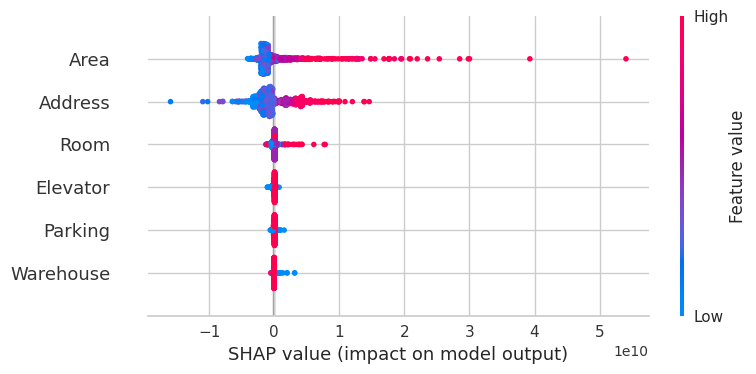

In [15]:
interpret_model(my_model)

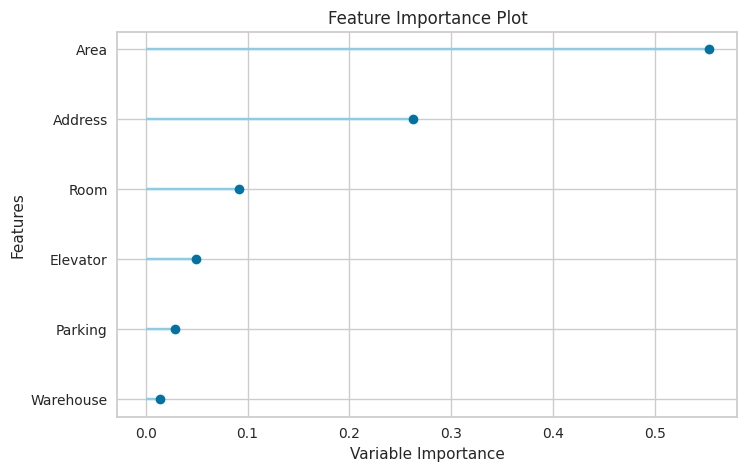

In [16]:
plot_model(estimator=my_model, plot='feature')

In [17]:
df.Area = df.Area.apply(lambda x: re.sub(',', '', x))
df.Area = pd.to_numeric(df.Area, errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3479 non-null   int64  
 1   Room       3479 non-null   int64  
 2   Parking    3479 non-null   bool   
 3   Warehouse  3479 non-null   bool   
 4   Elevator   3479 non-null   bool   
 5   Address    3456 non-null   object 
 6   Price      3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 119.0+ KB


In [19]:
df.describe()

,Area,Room,Price
count,3.479000e+03,3479.000000,3.479000e+03
mean,8.744000e+06,2.079908,5.359023e+09
std,3.167266e+08,0.758275,8.099935e+09
min,3.000000e+01,0.000000,3.600000e+06
25%,6.900000e+01,2.000000,1.418250e+09
50%,9.000000e+01,2.000000,2.900000e+09
75%,1.200000e+02,2.000000,6.000000e+09
max,1.616000e+10,5.000000,9.240000e+10


In [20]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3456 non-null   int64  
 1   Room       3456 non-null   int64  
 2   Parking    3456 non-null   bool   
 3   Warehouse  3456 non-null   bool   
 4   Elevator   3456 non-null   bool   
 5   Address    3456 non-null   object 
 6   Price      3456 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 145.1+ KB


In [23]:
df.Parking.value_counts(normalize=True) * 100

Parking
True     84.751157
False    15.248843
Name: proportion, dtype: float64

In [24]:
pd.crosstab(df.Parking, df.Room)

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [25]:
below_85_area = df[df.Area <= 85]
len(below_85_area)

1522

In [26]:
below_85_area.Parking.value_counts(normalize=True) * 100

Parking
True     72.536137
False    27.463863
Name: proportion, dtype: float64

In [27]:
df.Address.unique().size

192

In [28]:
pd.set_option('display.float_format', lambda x : '%.f' % x)

In [29]:
#pd.set_option('display.float_format', lambda x : f"{x:,}")
df.groupby('Room')['Price'].mean()

Room
0    7860500000
1    1707480867
2    3330303037
3   10938692886
4   25600328571
5   33734393939
Name: Price, dtype: float64

In [30]:
room_parking_room_mean_df = df.groupby(['Room', 'Parking'])['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [31]:
df_2 = df.copy()

In [32]:
df_2.loc[:, 'Price'] = df.Price.map("{:,.0f}".format)
df_2

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,"1,850,000,000"
1,60,1,True,True,True,Shahran,"1,850,000,000"
2,79,2,True,True,True,Pardis,"550,000,000"
3,95,2,True,True,True,Shahrake Qods,"902,500,000"
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000"
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,"3,500,000,000"
3475,83,2,True,True,True,Niavaran,"6,800,000,000"
3476,75,2,False,False,False,Parand,"365,000,000"
3477,105,2,True,True,True,Dorous,"5,600,000,000"


<Figure size 800x600 with 0 Axes>

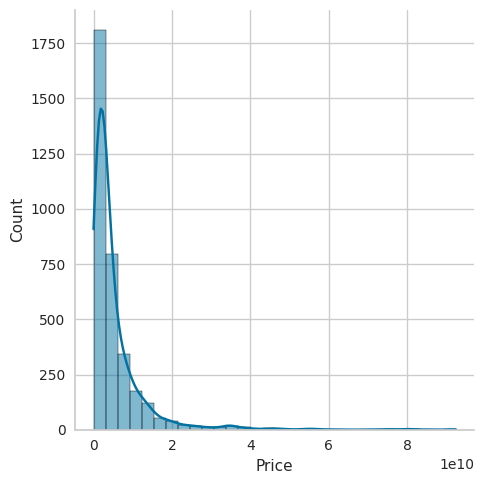

In [33]:
plt.figure(figsize=(8, 6))
sns.displot(df.Price, bins=30, kde=True)
plt.show()

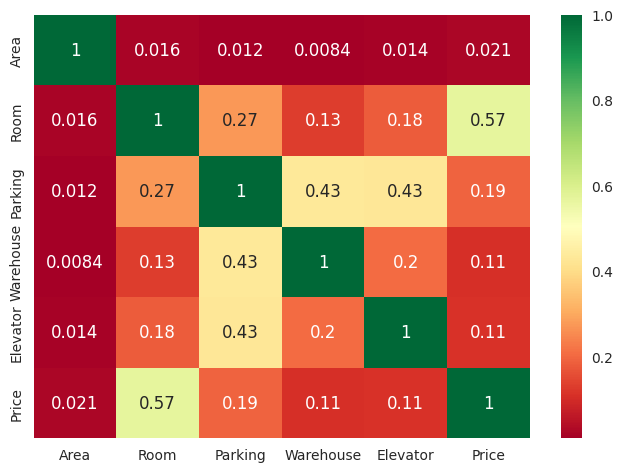

In [34]:
sns.heatmap(df.drop('Address', axis=1).corr(), annot=True, cmap='RdYlGn')
plt.show()

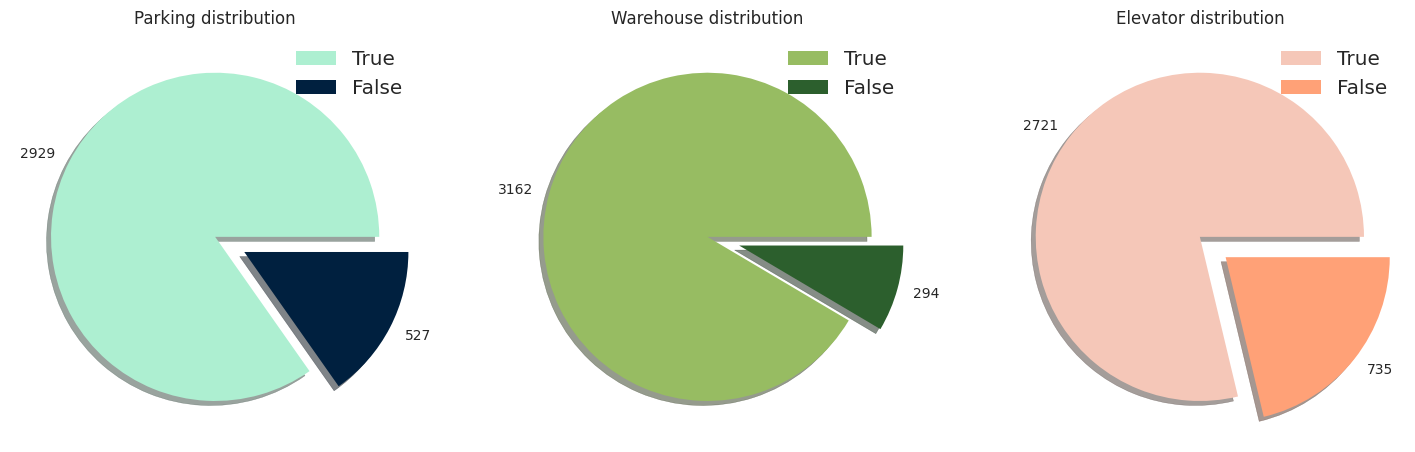

In [35]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']

for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

In [36]:
df3_address = df.Address.value_counts().copy()
df3_address = df3_address[:8]
df3_address

Address
Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
Saadat Abad               129
Parand                    127
Shahr-e-Ziba              109
Name: count, dtype: int64

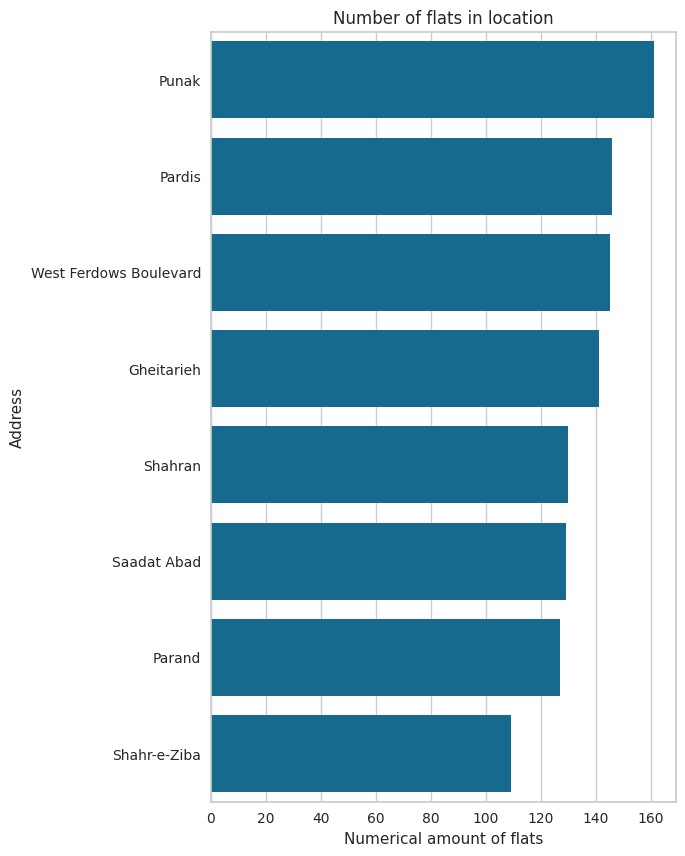

In [37]:
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3_address.values, y=df3_address.index, ax=ax)
plt.xlabel('Numerical amount of flats')
plt.title('Number of flats in location')
plt.show()

In [38]:
df.sort_values('Price', ascending=False)[['Address', 'Price']].head(10)

,Address,Price
1707,Zaferanieh,92400000000
1810,Abazar,91000000000
430,Lavasan,85000000000
819,Ekhtiarieh,81600000000
1332,Niavaran,80500000000
1694,Zafar,80000000000
3051,Dorous,79500000000
3107,Tajrish,75600000000
831,Mahmoudieh,75000000000
2394,Aqdasieh,74400000000
